# Cat And Dog image Prediction using CNN


1.  Here, I have already cleaned data using for our operation
2.  CNN based on Keras Seq2seq model for images specailly we use here.
3.  You may try to train (20 times) for getting batter results here I only trained 3 times.



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
X_data ="/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/cat_dog_finalData/X.pickle"
Y_data = "/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/cat_dog_finalData/y.pickle"

In [0]:
import pickle
X_features = pickle.load(open(X_data,"rb"))
Y_lables = pickle.load(open(Y_data,"rb"))

In [10]:
X_features.shape,Y_lables.shape

((24946, 100, 100, 1), (24946,))

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

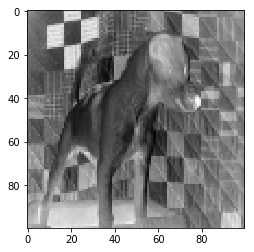

In [12]:
plt.imshow(np.squeeze(X_features[10]),cmap="binary")
plt.show()

In [13]:
Y_lables[10]  # yeah its allright we correctly mixed lables respact to image  of cat(0) and dog(1).

1

In [0]:
# here we just normalize the data for faster calculation 
X_features = X_features / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten

In [0]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=X_features.shape[1:], activation='relu'))
model.add(Convolution2D(32,(3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3),  activation='relu'))
model.add(Convolution2D(64, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Convolution2D(128,(3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Convolution2D(256, (3, 3),  activation='relu'))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss="binary_crossentropy",optimizer="RMSprop",metrics=['accuracy'])
model.fit(X_features,Y_lables,batch_size=64,epochs=3,validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 583s 33ms/sample - loss: 0.6951 - acc: 0.5053 - val_loss: 0.6887 - val_acc: 0.5278
Epoch 2/3
17462/17462 [==============================] - 580s 33ms/sample - loss: 0.6927 - acc: 0.5304 - val_loss: 0.6856 - val_acc: 0.5861
Epoch 3/3
17462/17462 [==============================] - 582s 33ms/sample - loss: 0.6692 - acc: 0.5974 - val_loss: 0.6642 - val_acc: 0.6112


In [31]:
predict = model.predict([X_features])
predict, predict.shape

(array([[0.4853698 ],
        [0.31441885],
        [0.47516575],
        ...,
        [0.31340203],
        [0.22858004],
        [0.25634986]], dtype=float32), (24946, 1))

In [34]:
np.argmax(predict[250])

0

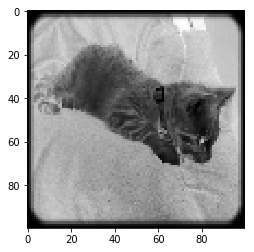

In [35]:
plt.imshow(np.squeeze(X_features[250]),cmap="binary")
plt.show()